In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import sklearn
from sklearn.model_selection import train_test_split

In [179]:
!wget -q https://github.com/velasquezjeisson/udem/raw/refs/heads/master/Proyecto%202/MateriasPrimasConsolidado.xlsx

In [213]:
df = pd.read_excel('~/MateriasPrimasConsolidado.xlsx', sheet_name='MateriasPrimasConsolidado', header=0, index_col=0)
df = df.dropna(axis=0, how='any')
df = df.dropna(axis=1, how='any')
#df = df.drop(axis=1, labels=['Local_Timestamp','TimeStampDb','Partida','Solicitud','Valor_SP_Final','SP_Activo_Final','MateriaPrima','Equipo'])
df = df.drop(axis=1, labels=['Local_Timestamp','TimeStampDb','Partida','Solicitud','Valor_SP_Final','SP_Activo_Final','Equipo'])
df['Time_Stamp'] = pd.to_datetime(df['Time_Stamp'], dayfirst=True)

df["Fecha"] = df["Time_Stamp"].dt.date

#df.set_index('Time_Stamp', inplace=True)
df_diario = df.groupby(["Fecha", "MateriaPrima"])["PV_Final"].sum().reset_index()

df_diario.head()



/tmp/ipykernel_50532/2858645691.py:6: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S.%f format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Time_Stamp'] = pd.to_datetime(df['Time_Stamp'], dayfirst=True)


,Fecha,MateriaPrima,PV_Final
0,2024-11-28,2EHA,5651.358130
1,2024-11-28,Butil,2752.593731
2,2024-11-28,Estireno,5025.812840
3,2024-11-28,Metil,3152.192714
4,2024-11-28,Soda,8239.567224


In [214]:
df_diario.tail()

,Fecha,MateriaPrima,PV_Final
743,2025-04-28,Xilol,108.856956
744,2025-04-29,2EHA,502.702148
745,2025-04-29,Butil,2292.275000
746,2025-04-29,Vam,9223.885000
747,2025-04-29,Xilol,1058.582361


In [215]:
df_pivot = df_diario.pivot(index="Fecha", columns="MateriaPrima", values="PV_Final")
df_pivot

MateriaPrima,2EHA,Butil,Estireno,Ethil,Metil,Soda,Toluol,Vam,Xilol
Fecha,,,,,,,,,
2024-11-28,5651.358130,2752.593731,5025.812840,NaN,3152.192714,8239.567224,6736.696367,13768.66396,NaN
2024-11-29,5650.316510,1836.894555,5024.984620,749.5489,3689.717932,3646.021680,6965.080599,9180.54900,NaN
2024-11-30,321.398438,13339.617859,7054.712950,NaN,3192.603677,4790.448612,8884.453287,16285.59395,NaN
2024-12-01,NaN,12594.514520,7057.263850,NaN,2903.960332,NaN,6805.754640,16287.87283,NaN
2024-12-02,NaN,10394.985180,2353.534000,NaN,1940.699500,5182.944005,9080.265120,19759.70450,NaN
...,...,...,...,...,...,...,...,...,...
2025-04-25,1515.761717,736.353517,1736.783200,NaN,1922.503744,3233.977080,NaN,14341.44200,1059.217257
2025-04-26,NaN,5306.818606,2934.857356,NaN,640.929900,1299.590000,195.050725,4439.28300,477.775178
2025-04-27,NaN,12327.213992,5326.094586,NaN,1148.381800,2489.455435,161.332911,8879.89100,394.897765


<Figure size 1200x600 with 0 Axes>

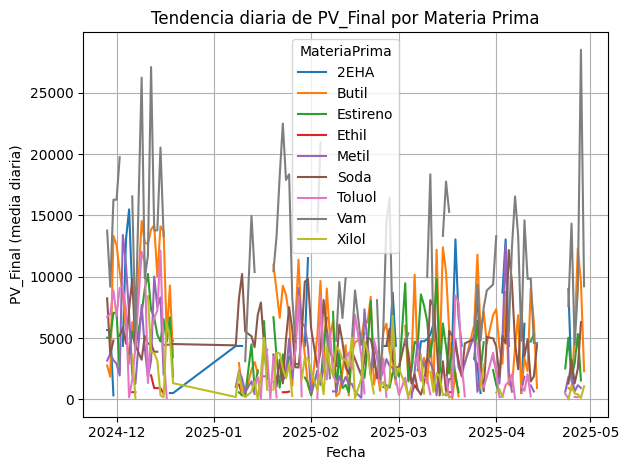

In [216]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df_pivot.plot()
plt.title("Tendencia diaria de PV_Final por Materia Prima")
plt.xlabel("Fecha")
plt.ylabel("PV_Final (media diaria)")
plt.grid(True)
plt.legend(title="MateriaPrima")
plt.tight_layout()
plt.show()

In [217]:
df_diario.head()

,Fecha,MateriaPrima,PV_Final
0,2024-11-28,2EHA,5651.358130
1,2024-11-28,Butil,2752.593731
2,2024-11-28,Estireno,5025.812840
3,2024-11-28,Metil,3152.192714
4,2024-11-28,Soda,8239.567224


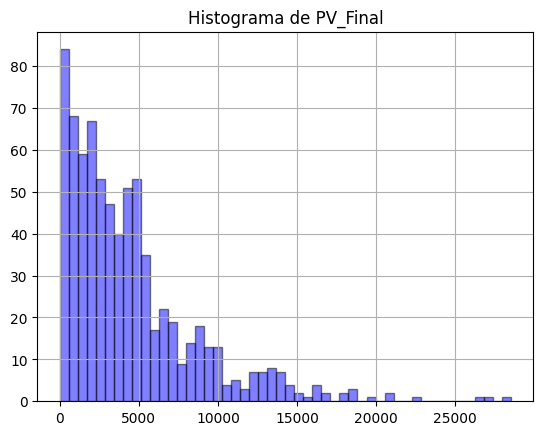

In [218]:
df_diario.hist(bins=50, alpha=0.5, color='blue', edgecolor='black')
plt.title('Histograma de PV_Final')
plt.show()


Text(0.5, 1.0, 'Histograma de PV_Final (filtrado)')

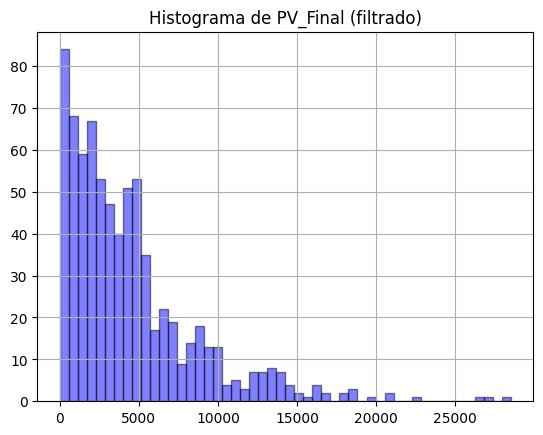

In [219]:
df_filtrado = df_diario[df_diario["PV_Final"] > 0]
df_filtrado["PV_Final"].hist(bins=50, alpha=0.5, color='blue', edgecolor='black')
plt.title('Histograma de PV_Final (filtrado)')

In [220]:
df_filtrado = df_filtrado.set_index("Fecha").sort_index()


In [221]:
df_filtrado.head()

,MateriaPrima,PV_Final
Fecha,,
2024-11-28,2EHA,5651.358130
2024-11-28,Butil,2752.593731
2024-11-28,Estireno,5025.812840
2024-11-28,Metil,3152.192714
2024-11-28,Soda,8239.567224


In [222]:
retardo = 10
for i in range(1, retardo+1):
    df_filtrado['PV_Final-'+str(i)] = df_filtrado['PV_Final'].shift(i)
df_filtrado.dropna(inplace=True)
df_filtrado.head()

,MateriaPrima,PV_Final,PV_Final-1,PV_Final-2,PV_Final-3,PV_Final-4,PV_Final-5,PV_Final-6,PV_Final-7,PV_Final-8,PV_Final-9,PV_Final-10
Fecha,,,,,,,,,,,,
2024-11-29,Ethil,749.548900,5024.984620,1836.894555,5650.316510,13768.663960,6736.696367,8239.567224,3152.192714,5025.812840,2752.593731,5651.358130
2024-11-29,Metil,3689.717932,749.548900,5024.984620,1836.894555,5650.316510,13768.663960,6736.696367,8239.567224,3152.192714,5025.812840,2752.593731
2024-11-29,Soda,3646.021680,3689.717932,749.548900,5024.984620,1836.894555,5650.316510,13768.663960,6736.696367,8239.567224,3152.192714,5025.812840
2024-11-29,Toluol,6965.080599,3646.021680,3689.717932,749.548900,5024.984620,1836.894555,5650.316510,13768.663960,6736.696367,8239.567224,3152.192714
2024-11-29,Vam,9180.549000,6965.080599,3646.021680,3689.717932,749.548900,5024.984620,1836.894555,5650.316510,13768.663960,6736.696367,8239.567224


In [223]:
X = df_filtrado.drop('PV_Final', axis=1)
y = df_filtrado['PV_Final']
X_train = X.iloc[:-30]
X_test = X.iloc[-30:]
y_train = y.iloc[:-30]
y_test = y.iloc[-30:]

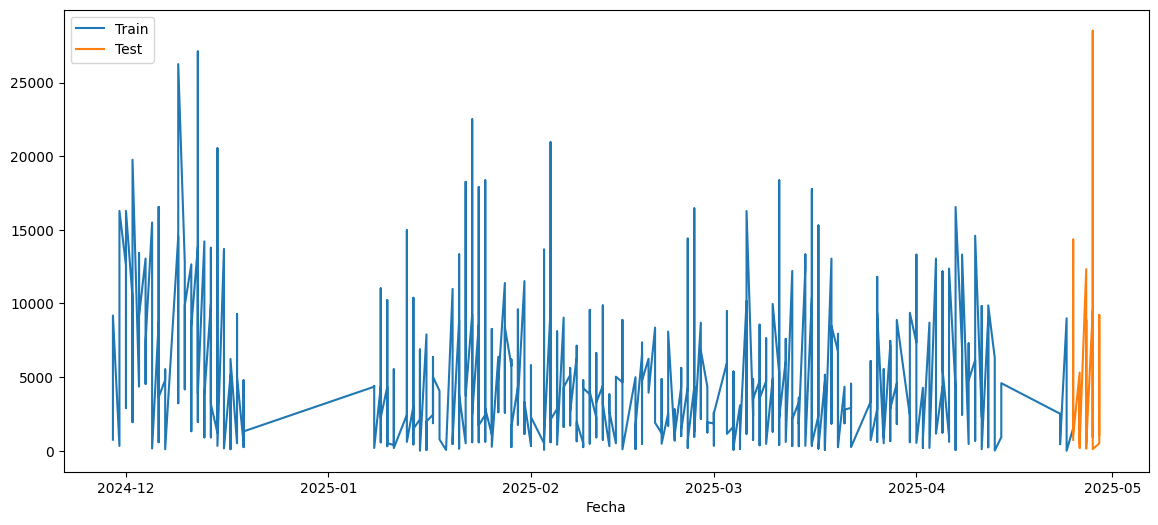

In [224]:
plt.figure(figsize=(14, 6))  # ← amplia el tamaño de la figura
y_train.plot(label='Train')
y_test.plot(label='Test')
plt.legend()

Normalización en caso de que se requiera

In [226]:
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Alinear columnas entre train y test por si hay diferencias
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)


In [227]:
import numpy as np

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)
x_train_log = np.log1p(X_train_encoded)
x_test_log = np.log1p(X_test_encoded)


Score por Smape

In [228]:
import numpy as np
from sklearn.metrics import make_scorer

def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0  # evitar división por cero
    return np.mean(diff) * 100

# Como scorer negativo porque GridSearchCV maximiza por defecto
smape_scorer = make_scorer(smape, greater_is_better=False)

Score Mape

In [229]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)


In [231]:
x_train_log.head()

/home/jeisson/myenv/lib/python3.12/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,PV_Final-1,PV_Final-2,PV_Final-3,PV_Final-4,PV_Final-5,PV_Final-6,PV_Final-7,PV_Final-8,PV_Final-9,PV_Final-10,MateriaPrima_2EHA,MateriaPrima_Butil,MateriaPrima_Estireno,MateriaPrima_Ethil,MateriaPrima_Metil,MateriaPrima_Soda,MateriaPrima_Toluol,MateriaPrima_Vam,MateriaPrima_Xilol
Fecha,,,,,,,,,,,,,,,,,,,
2024-11-29,8.522377,7.516376,8.639644,9.530223,8.815473,9.016824,8.056171,8.522541,7.920662,8.639828,0.0,0.0,0.0,0.693359,0.000000,0.000000,0.000000,0.000000,0.0
2024-11-29,6.620805,8.522377,7.516376,8.639644,9.530223,8.815473,9.016824,8.056171,8.522541,7.920662,0.0,0.0,0.0,0.000000,0.693359,0.000000,0.000000,0.000000,0.0
2024-11-29,8.213576,6.620805,8.522377,7.516376,8.639644,9.530223,8.815473,9.016824,8.056171,8.522541,0.0,0.0,0.0,0.000000,0.000000,0.693359,0.000000,0.000000,0.0
2024-11-29,8.201666,8.213576,6.620805,8.522377,7.516376,8.639644,9.530223,8.815473,9.016824,8.056171,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.693359,0.000000,0.0
2024-11-29,8.848808,8.201666,8.213576,6.620805,8.522377,7.516376,8.639644,9.530223,8.815473,9.016824,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.693359,0.0


### Modelo por XGBoost

In [232]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from scipy.stats import uniform, randint


# Mismo espacio de hiperparámetros (puedes dejarlo como lista o usar distribuciones estadísticas)
param_distributions = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 300, 500],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 2]
}

model = XGBRegressor(objective='reg:squarederror', random_state=42)

model_xgb = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=50,  # número de combinaciones aleatorias a probar (ajústalo según el tiempo disponible)
    scoring=mape_scorer,
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

model_xgb.fit(x_train_log, y_train_log)

print("Mejores parámetros:", model_xgb.best_params_)
print("Mejor score de validación:", model_xgb.best_score_)
print("Score de entrenamiento:", model_xgb.score(x_train_log, y_train_log))
print("Score de prueba:", model_xgb.score(x_test_log, y_test_log))

y_pred_xgb_log = model_xgb.predict(x_test_log)
y_pred_xgb = np.expm1(y_pred_xgb_log)


mape_test_xgb = mean_absolute_percentage_error(np.expm1(y_test_log), y_pred_xgb)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Mejores parámetros: {'subsample': 1.0, 'reg_lambda': 0.5, 'reg_alpha': 0.5, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
Mejor score de validación: -0.1404341037773989
Score de entrenamiento: -0.11796918874270954
Score de prueba: -0.14634148216873955


In [233]:
mape_test_xgb

2.1297186804402686

/tmp/ipykernel_50532/4074096641.py:4: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(y_test.index, y_pred_xgb, label='Predicción', color='red')


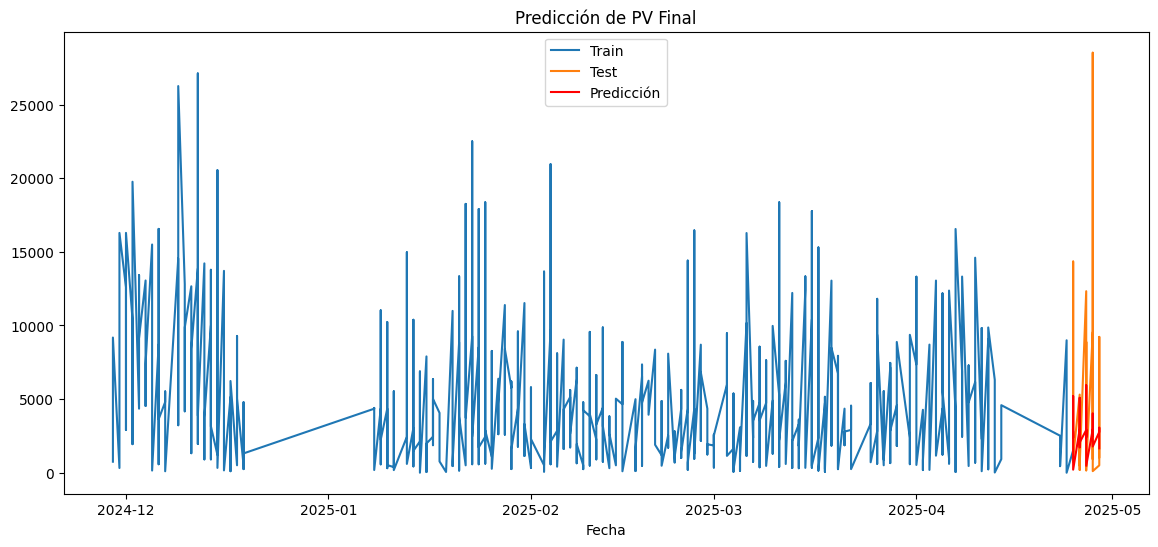

In [234]:
plt.figure(figsize=(14, 6))  # ← amplia el tamaño de la figura
y_train.plot(label='Train')
y_test.plot(label='Test')
plt.plot(y_test.index, y_pred_xgb, label='Predicción', color='red')
plt.title('Predicción de PV Final')
plt.legend()

/tmp/ipykernel_50532/612378395.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_importance.head(20), x='Importancia', y='Variable', palette='viridis')


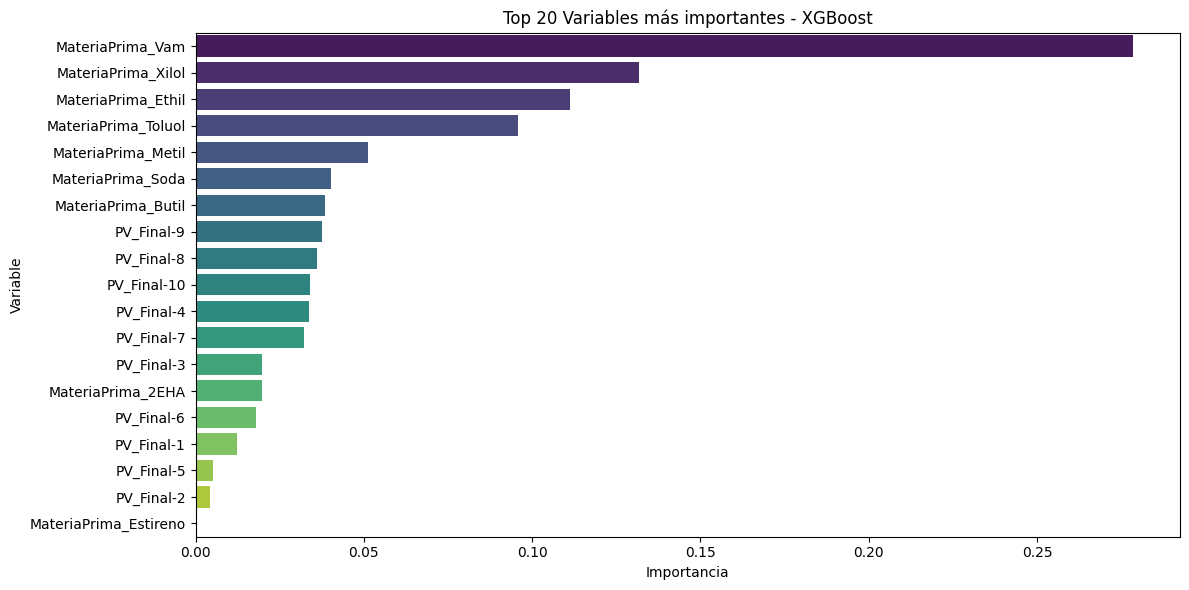

In [235]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de tener un modelo ya entrenado. Por ejemplo:
# model_xgb.fit(X_train, y_train)

# Crear un DataFrame con las importancias
importances = model_xgb.best_estimator_.feature_importances_
features = X_train_encoded.columns  # asegúrate que X_train sea un DataFrame

df_importance = pd.DataFrame({
    'Variable': features,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

# Visualizar
plt.figure(figsize=(12, 6))
sns.barplot(data=df_importance.head(20), x='Importancia', y='Variable', palette='viridis')
plt.title('Top 20 Variables más importantes - XGBoost')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()


### Modelo por DecisionTreeRegressor

In [236]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_percentage_error

# Definir espacio de hiperparámetros
param_distributions_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Modelo base
dt = DecisionTreeRegressor(random_state=42)

# Búsqueda aleatoria con validación cruzada y MAPE
model_dt = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_distributions_dt,
    n_iter=10,  # puedes aumentar si quieres probar más combinaciones
    scoring=mape_scorer,
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Entrenamiento
model_dt.fit(x_train_log, y_train_log)

# Resultados
print("Mejores parámetros:", model_dt.best_params_)
print(f"Score de validación cruzada (MAPE): {-model_dt.best_score_:.2f}%")
print(f"Score de entrenamiento (MAPE): {-model_dt.score(x_train_log, y_train_log):.2f}%")
print(f"Score de prueba (MAPE): {-model_dt.score(x_test_log, y_test_log):.2f}%")


# Calcular MAPE en test
y_pred_dt_log = model_dt.predict(x_test_log)
y_pred_dt = np.expm1(y_pred_dt_log)

mape_test_dt = mean_absolute_percentage_error(np.expm1(y_test_log), y_pred_dt)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores parámetros: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 5}
Score de validación cruzada (MAPE): 0.14%
Score de entrenamiento (MAPE): 0.11%
Score de prueba (MAPE): 0.14%


In [237]:
mape_test_dt

2.7184401581620063

/tmp/ipykernel_50532/3134252426.py:4: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(y_test.index, y_pred_dt, label='Predicción', color='red')


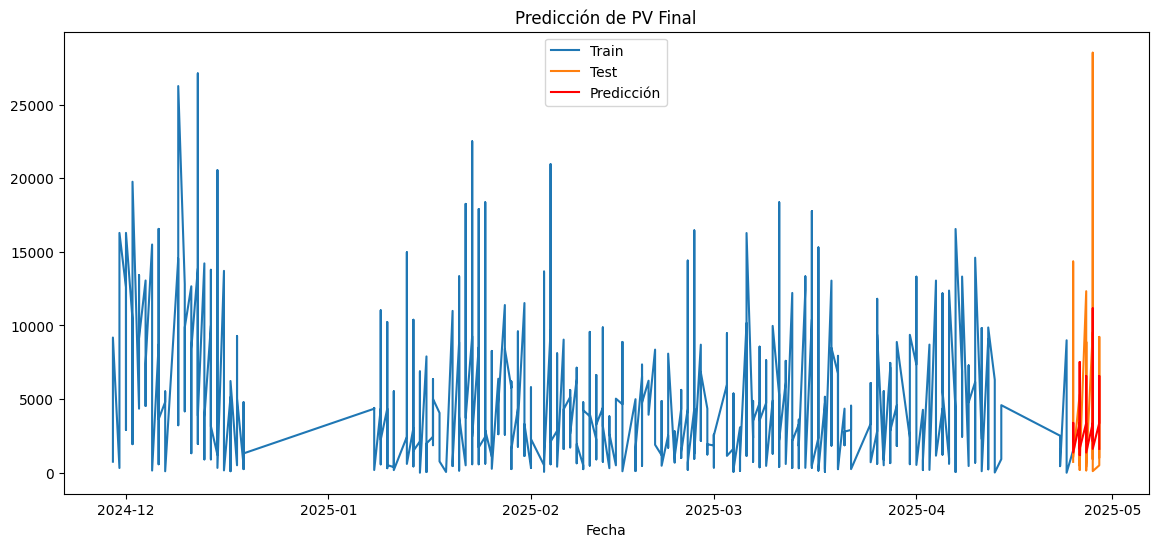

In [238]:
plt.figure(figsize=(14, 6))  # ← amplia el tamaño de la figura
y_train.plot(label='Train')
y_test.plot(label='Test')
plt.plot(y_test.index, y_pred_dt, label='Predicción', color='red')
plt.title('Predicción de PV Final')
plt.legend()

### Modelo por GradientBoostingRegressor

In [239]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_percentage_error

# Hiperparámetros para Gradient Boosting
param_distributions_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.7, 0.8, 1.0]
}

# Modelo base
gb = GradientBoostingRegressor(random_state=42)

# Búsqueda aleatoria con validación cruzada y MAPE
model_gb = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_distributions_gb,
    n_iter=30,  # puedes ajustar según el tiempo disponible
    scoring=mape_scorer,
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Entrenar con la variable logarítmica
model_gb.fit(x_train_log, y_train_log)

# Mostrar resultados
print("Mejores parámetros:", model_gb.best_params_)
print(f"Score de validación cruzada (MAPE): {-model_gb.best_score_:.2f}%")
print(f"Score de entrenamiento (MAPE): {-model_gb.score(x_train_log, y_train_log):.2f}%")
print(f"Score de prueba (MAPE): {-model_gb.score(x_test_log, y_test_log):.2f}%")

# Predicción y evaluación en escala original
y_pred_gb_log = model_gb.predict(x_test_log)
y_pred_gb = np.expm1(y_pred_gb_log)

# MAPE real en escala original
mape_test_gb = mean_absolute_percentage_error(np.expm1(y_test_log), y_pred_gb)
print(f"MAPE real en prueba (escala original): {mape_test_gb * 100:.2f}%")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Mejores parámetros: {'subsample': 1.0, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 3, 'learning_rate': 0.05}
Score de validación cruzada (MAPE): 0.14%
Score de entrenamiento (MAPE): 0.11%
Score de prueba (MAPE): 0.12%
MAPE real en prueba (escala original): 199.53%


In [240]:
mape_test_gb

1.99528223851661

/tmp/ipykernel_50532/523898098.py:4: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(y_test.index, y_pred_gb, label='Predicción', color='red')


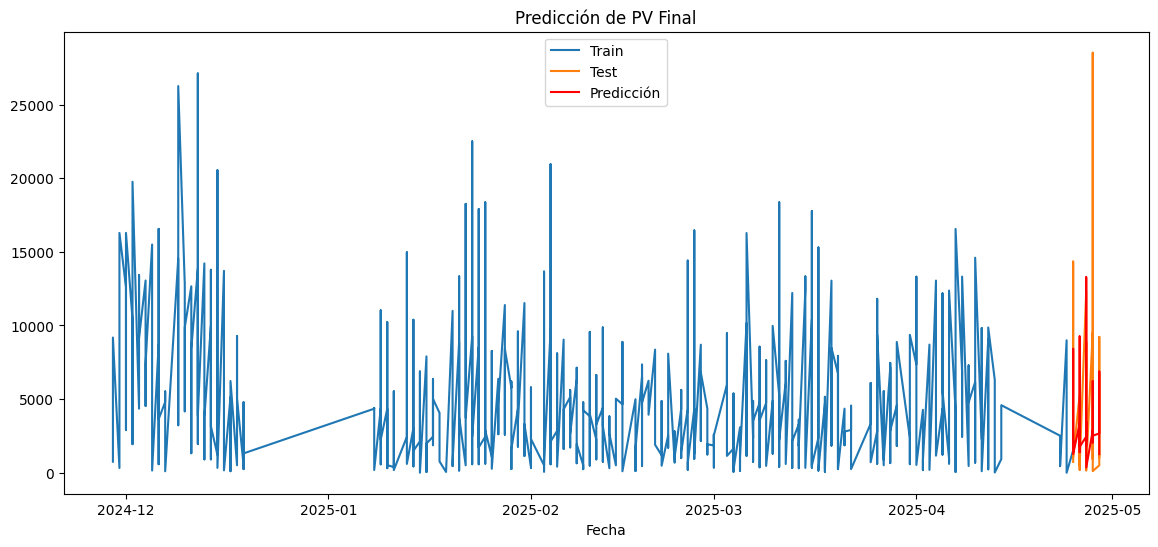

In [241]:
plt.figure(figsize=(14, 6))  # ← amplia el tamaño de la figura
y_train.plot(label='Train')
y_test.plot(label='Test')
plt.plot(y_test.index, y_pred_gb, label='Predicción', color='red')
plt.title('Predicción de PV Final')
plt.legend()

### Random Forest Regressor

In [242]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_percentage_error

# Espacio de hiperparámetros para Random Forest
param_distributions_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Modelo base
rf = RandomForestRegressor(random_state=42)

# Randomized Search con validación cruzada y MAPE
model_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions_rf,
    n_iter=30,  # puedes aumentar si tienes tiempo
    scoring=mape_scorer,
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Entrenamiento con la variable objetivo transformada
model_rf.fit(x_train_log, y_train_log)

# Reporte de resultados
print("Mejores parámetros:", model_rf.best_params_)
print(f"Score de validación cruzada (MAPE): {-model_rf.best_score_:.2f}%")
print(f"Score de entrenamiento (MAPE): {-model_rf.score(x_train_log, y_train_log):.2f}%")
print(f"Score de prueba (MAPE): {-model_rf.score(x_test_log, y_test_log):.2f}%")

# Predicción y evaluación en escala original
y_pred_rf_log = model_rf.predict(x_test_log)
y_pred_rf = np.expm1(y_pred_rf_log)
mape_test_rf = mean_absolute_percentage_error(np.expm1(y_test_log), y_pred_rf)
print(f"MAPE real en prueba (escala original): {mape_test_rf * 100:.2f}%")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Mejores parámetros: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None}
Score de validación cruzada (MAPE): 0.14%
Score de entrenamiento (MAPE): 0.08%
Score de prueba (MAPE): 0.12%
MAPE real en prueba (escala original): 147.63%


In [243]:
mape_test_rf

1.4762697592975904

/tmp/ipykernel_50532/4283252758.py:4: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(y_test.index, y_pred_rf, label='Predicción', color='red')


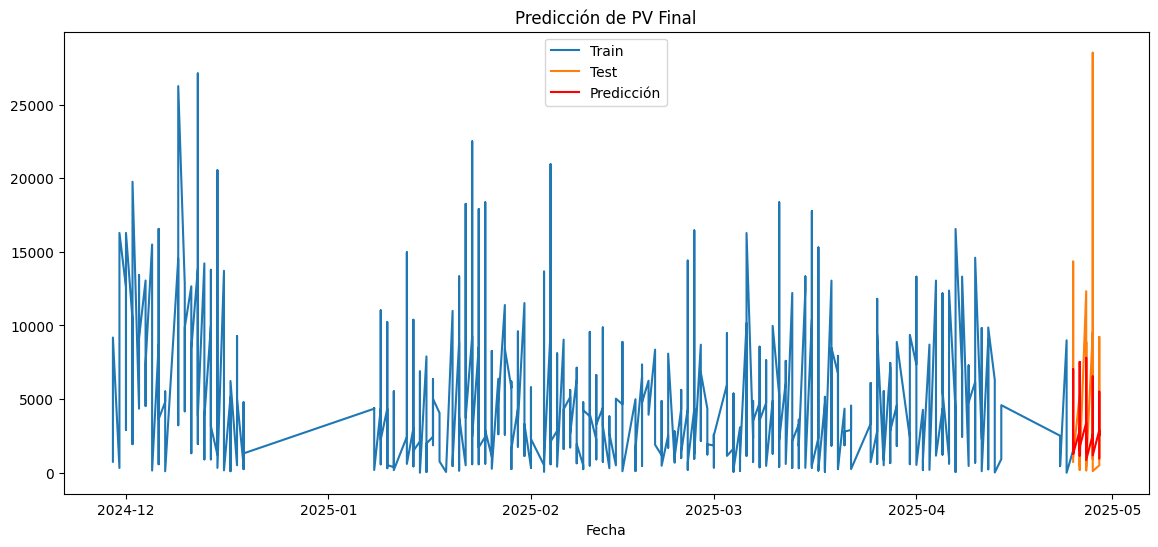

In [244]:
plt.figure(figsize=(14, 6))  # ← amplia el tamaño de la figura
y_train.plot(label='Train')
y_test.plot(label='Test')
plt.plot(y_test.index, y_pred_rf, label='Predicción', color='red')
plt.title('Predicción de PV Final')
plt.legend()

### Comparacion modelos por MAPE

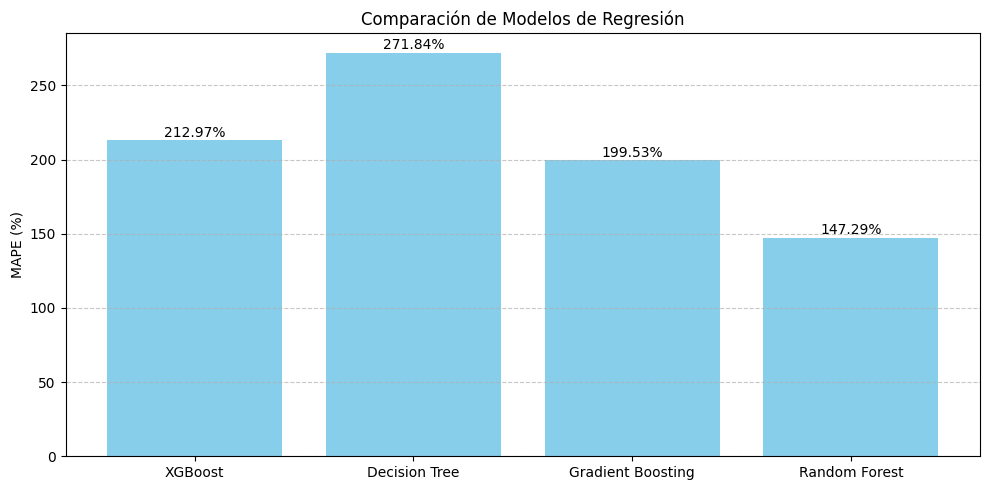

In [210]:
x = ['XGBoost', 'Decision Tree', 'Gradient Boosting', 'Random Forest']
y = [mape_test_xgb*100, mape_test_dt*100, mape_test_gb*100, mape_test_rf*100]

plt.figure(figsize=(10, 5))
bars = plt.bar(x, y, color='skyblue')
plt.ylabel('MAPE (%)')
plt.title('Comparación de Modelos de Regresión')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Etiquetas encima de las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(14, 6))  # ← amplia el tamaño de la figura
y_train.plot(label='Train')
y_test.plot(label='Test')
plt.plot(y_test.index, y_pred_rf, label='random forest', color='red')
plt.plot(y_test.index, y_pred_gb, label='gradient boosting', color='green')
plt.plot(y_test.index, y_pred_dt, label='decision tree', color='blue')
plt.plot(y_test.index, y_pred_xgb, label='xgboost', color='orange')
plt.plot(y_test.index, y_pred_rf, label='random forest', color='red')
plt.title('Predicción de PV Final')
plt.legend()

### Implementación con DL

In [ ]:
def crear_secuencias(data, ventana=10, horizonte=1):
    X, y = [], []
    for i in range(len(data) - ventana - horizonte):
        X.append(data[i:i+ventana])   # 30 días de entrada
        y.append(data[i+ventana:i+ventana+horizonte])  # 5 días de salida
    return np.array(X), np.array(y)


serie = df_filtrado["PV_Final"].values

horizonte = 30
ventana = 10
X, y = crear_secuencias(serie, ventana, horizonte)

In [ ]:
# Dividir en datos de entrenamiento (80%) y prueba (20%)
train_size = int(len(X) * 0.8)
X_train_lstm, X_test_lstm = X[:train_size], X[train_size:]
y_train_lstm, y_test_lstm = y[:train_size], y[train_size:]

In [ ]:
# Ajustamos la forma para LSTM (samples, time steps, features)
X_train_k = X_train_lstm.reshape((X_train_lstm.shape[0], X_train_lstm.shape[1], 1))
X_test_k = X_test_lstm.reshape((X_test_lstm.shape[0], X_test_lstm.shape[1], 1))

print(f"Forma de X_train: {X_train_k.shape}, y_train: {y_train_lstm.shape}")
print(f"Forma de X_test: {X_test_k.shape}, y_test: {y_test_lstm.shape}")


In [ ]:
from keras import layers, models, Input, Sequential, Model, optimizers
from keras.utils import to_categorical, plot_model

# Definir la arquitectura del modelo LSTM
model = Sequential([
    layers.LSTM(64, activation='relu', return_sequences=True, input_shape=(ventana,1)),  # Capa LSTM con 64 neuronas
    layers.LSTM(64, activation='relu'),  # Segunda capa LSTM sin return_sequences
    layers.Dense(32, activation='relu'),  # Capa densa intermedia
    layers.Dense(32, activation='relu'),  # Capa densa intermedia
    layers.Dense(horizonte)  # Capa de salida con 30 neuronas (30 días de predicción)
])

# Compilar el modelo
optimizador = optimizers.Adam(learning_rate=0.0001)


model.compile(optimizer=optimizador, loss='mse')

# Resumen del modelo
model.summary()

In [ ]:
history = model.fit(X_train_k, y_train_lstm, epochs=200, batch_size=32, verbose=1)


In [ ]:
plt.figure(figsize=(14, 6))  # ← amplia el tamaño de la figura
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Error cuadrático medio (MSE)')
plt.title('Evolución de la pérdida del modelo')
plt.legend()
plt.show()


In [ ]:
predicciones = model.predict(X_test_lstm)


In [ ]:
mape_test_lstm = mean_absolute_percentage_error(y_test_lstm, predicciones)
print(f"MAPE real en prueba (escala original): {mape_test_lstm * 100:.2f}%")

In [ ]:
x = ['XGBoost', 'Decision Tree', 'Gradient Boosting', 'Random Forest', 'LSTM']
y = [mape_test_xgb*100, mape_test_dt*100, mape_test_gb*100, mape_test_rf*100, mape_test_lstm*100]

plt.figure(figsize=(10, 5))
bars = plt.bar(x, y, color='skyblue')
plt.ylabel('MAPE (%)')
plt.title('Comparación de Modelos de Regresión')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Etiquetas encima de las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
y_pred_xgb.shape

In [ ]:
# lstm_mean_pred = predicciones.mean(axis=1)  # (14,)
lstm_mean_pred = predicciones[0]  # (14,)

plt.figure(figsize=(14, 6))  # ← amplia el tamaño de la figura
y_train.plot(label='Train')
y_test.plot(label='Test')
plt.plot(y_test.index, y_pred_rf, label='random forest', color='red')
plt.plot(y_test.index, y_pred_gb, label='gradient boosting', color='green')
plt.plot(y_test.index, y_pred_dt, label='decision tree', color='blue')
plt.plot(y_test.index, y_pred_xgb, label='xgboost', color='orange')
plt.plot(y_test.index, y_pred_rf, label='random forest', color='red')
plt.plot(y_test.index[:len(lstm_mean_pred)], lstm_mean_pred, label='LSTM (prom)', color='purple')
plt.title('Predicción de PV Final')
plt.legend()